#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [ ]:
import torch
import torchvision.models as models


model = models.resnet18(pretrained=True)

print(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели.

- [ ] Проверено на семинаре

In [ ]:
import torch
import torchvision.models as models
from torchsummary import summary


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
model.eval()

print("Структура модели VGG16:")
print(model)


def count_layers(module):
    layers = 0
    for name, child in module.named_children():
        if len(list(child.children())) == 0:
            layers += 1
        else:
            layers += count_layers(child)
    return layers

total_layers = count_layers(model)
print(f"\nОбщее количество слоев: {total_layers}")


trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in model.parameters())

print(f"\nКоличество настраиваемых параметров: {trainable_params}")
print(f"Общее количество параметров: {total_params}")



Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 114MB/s]


Структура модели VGG16:
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=

<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [ ] Проверено на семинаре

In [ ]:
import torch
from torch.utils.data import Dataset, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
import zipfile
import os
from torchvision.models import VGG16_Weights


if not os.path.exists('cat_breeds'):
    with zipfile.ZipFile('cat_breeds_4.zip', 'r') as zip_ref:
        zip_ref.extractall('cat_breeds')

class CatBreeds(Dataset):
    def __init__(self, root, transform=None):
        self.dataset = ImageFolder(root=root)
        self.transform = transform
        self.classes = self.dataset.classes
        self.class_to_idx = self.dataset.class_to_idx

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        if self.transform:
            img = self.transform(img)
        return img, label


train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = VGG16_Weights.IMAGENET1K_V1.transforms()


correct_root = os.path.join('cat_breeds', 'cat_breeds_4')
full_dataset = CatBreeds(root=correct_root, transform=None)


train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])


train_dataset.dataset.transform = train_transform
test_dataset.dataset.transform = test_transform


print(f"Всего изображений: {len(full_dataset)}")
print(f"Обучающая выборка: {len(train_dataset)}")
print(f"Тестовая выборка: {len(test_dataset)}")
print(f"Классы: {full_dataset.classes}")

sample_img, sample_label = train_dataset[0]
print(f"\nРазмер изображения после преобразований: {sample_img.shape}")
print(f"Метка: {sample_label} ({full_dataset.classes[sample_label]})")

Всего изображений: 4000
Обучающая выборка: 3200
Тестовая выборка: 800
Классы: ['American Shorthair', 'Persian', 'Russian Blue', 'Tiger']

Размер изображения после преобразований: torch.Size([3, 224, 224])
Метка: 1 (Persian)


<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем.

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве.

- [ ] Проверено на семинаре

Всего изображений: 4000
Обучающая выборка: 3200
Тестовая выборка: 800
Классы: ['American Shorthair', 'Persian', 'Russian Blue', 'Tiger']
Обучаемых параметров после заморозки: 16388


Epoch 1: 100%|██████████| 100/100 [37:13<00:00, 22.33s/it]


Epoch 1: Loss: 0.6612, Train Acc: 81.72%, Test Acc: 79.50%


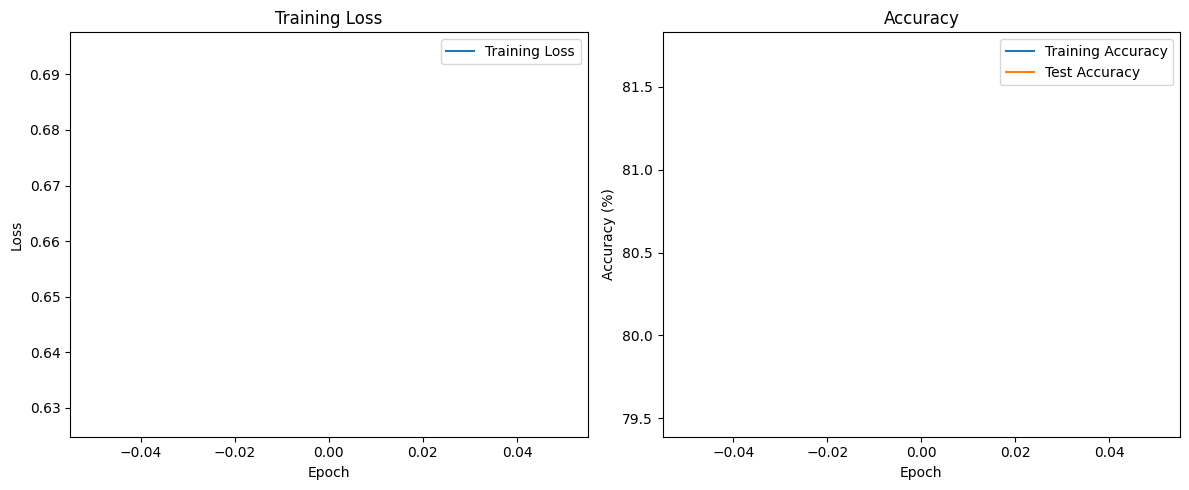

In [ ]:
import torch
from torch.utils.data import Dataset, random_split, DataLoader
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
import zipfile
import os
from torchvision.models import VGG16_Weights
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim


if not os.path.exists('cat_breeds'):
    with zipfile.ZipFile('cat_breeds_4.zip', 'r') as zip_ref:
        zip_ref.extractall('cat_breeds')

class CatBreeds(Dataset):
    def __init__(self, root, transform=None):
        self.dataset = ImageFolder(root=root)
        self.transform = transform
        self.classes = self.dataset.classes
        self.class_to_idx = self.dataset.class_to_idx

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = VGG16_Weights.IMAGENET1K_V1.transforms()

correct_root = os.path.join('cat_breeds', 'cat_breeds_4')
full_dataset = CatBreeds(root=correct_root, transform=None)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

train_dataset.dataset.transform = train_transform
test_dataset.dataset.transform = test_transform


batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Всего изображений: {len(full_dataset)}")
print(f"Обучающая выборка: {len(train_dataset)}")
print(f"Тестовая выборка: {len(test_dataset)}")
print(f"Классы: {full_dataset.classes}")


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

for param in model.parameters():
    param.requires_grad = False

num_classes = len(train_dataset.dataset.classes)
model.classifier[6] = nn.Linear(4096, num_classes)

trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Обучаемых параметров после заморозки: {trainable_params}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def compute_accuracy(loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

epochs = 1
train_losses = []
train_accs = []
test_accs = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_acc = compute_accuracy(train_loader)
    test_acc = compute_accuracy(test_loader)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"Epoch {epoch+1}: Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

Обучаемых параметров в v2: 126641668


Epoch 1: 100%|██████████| 100/100 [36:09<00:00, 21.69s/it]


Epoch 1: Loss: 0.5825, Train Acc: 79.69%, Test Acc: 78.12%


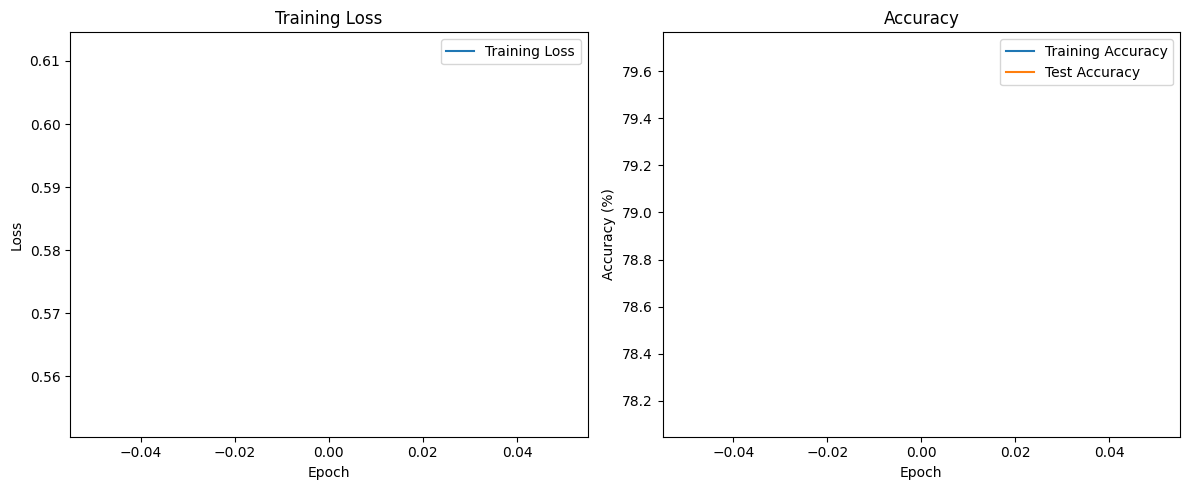

In [ ]:
model_v2 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)


for param in model_v2.parameters():
    param.requires_grad = False

for param in model_v2.features[24:].parameters():
    param.requires_grad = True


for param in model_v2.classifier.parameters():
    param.requires_grad = True


model_v2.classifier[6] = nn.Linear(4096, num_classes)

trainable_params_v2 = sum(p.numel() for p in model_v2.parameters() if p.requires_grad)
print(f"Обучаемых параметров в v2: {trainable_params_v2}")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def compute_accuracy(loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


epochs = 1
train_losses = []
train_accs = []
test_accs = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


    train_loss = running_loss / len(train_loader)
    train_acc = compute_accuracy(train_loader)
    test_acc = compute_accuracy(test_loader)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"Epoch {epoch+1}: Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. Повторите решение задачи 3, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

Обучаемых параметров: 126641668


Epoch 1: 100%|██████████| 100/100 [45:04<00:00, 27.04s/it]


Epoch 1: Loss: 0.6354, Train Acc: 73.62%, Test Acc: 80.25%


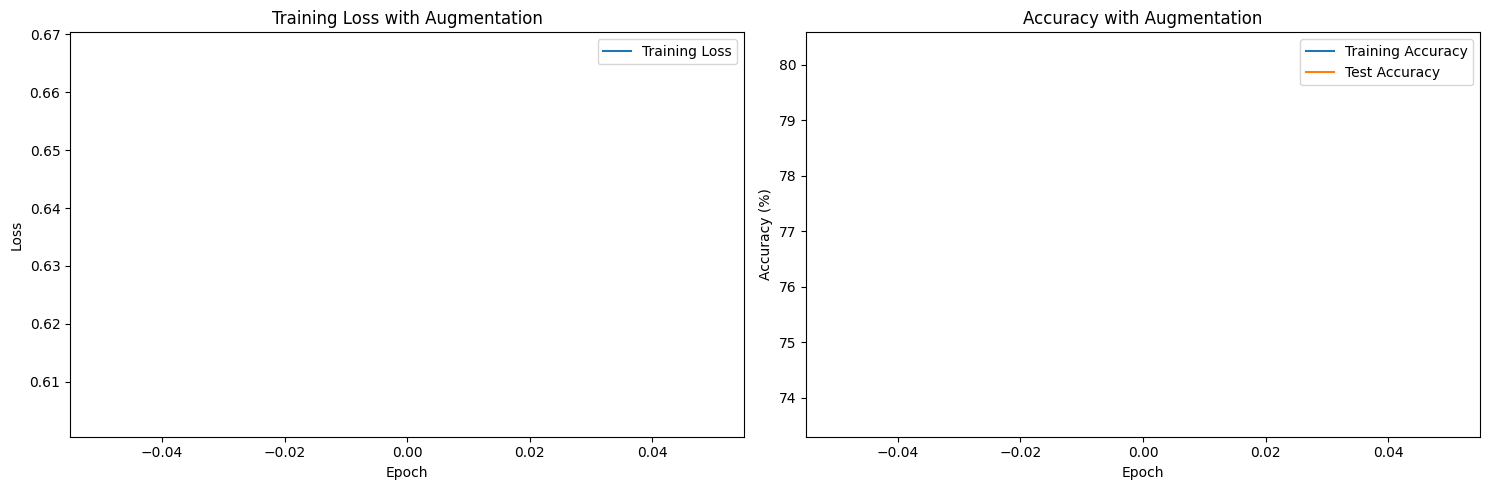


Final Training Accuracy: 73.62%
Final Test Accuracy: 80.25%


In [ ]:
train_transform_augmented = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset.dataset.transform = train_transform_augmented
test_dataset.dataset.transform = test_transform


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)


for param in model.parameters():
    param.requires_grad = False


for param in model.features[24:].parameters():
    param.requires_grad = True
for param in model.classifier.parameters():
    param.requires_grad = True


num_classes = len(train_dataset.dataset.classes)
model.classifier[6] = nn.Linear(4096, num_classes)


trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Обучаемых параметров: {trainable_params}")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


epochs = 1
train_losses = []
train_accs = []
test_accs = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    test_acc = compute_accuracy(test_loader)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"Epoch {epoch+1}: Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with Augmentation')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy with Augmentation')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nFinal Training Accuracy: {train_accs[-1]:.2f}%")
print(f"Final Test Accuracy: {test_accs[-1]:.2f}%")

## Обратная связь
- [ ] Хочу получить обратную связь по решению